<a href='http://www.scienceacademy.ca'> <img style="float: left;height:70px" src="Log_SA.jpeg"></a>

# Principal Component Analysis with scikit-learn in Python

Hi guys,<br>
Welcome to the practical lecture of Principal Component Analysis with Python's machine learning library, scikit-learn. In the previous lecture, we have discussed the key concepts and working principle behind PCA. It's time to learn by doing.<br>

Let's use the breast cancer dataset for this section. As we have learned, PCS is a great statistical tool to reduce the dimensionality of the data set without losing information, when our dataset contains several dimensions/features. Breast cancer data is a great example for PCA becasue it has 30 features. <br>
We can load this dataset directly from scikit learn. <br>

### Let's import some important libraries and load the dataset first!

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

**Let's check the Cancer dataset, it has 30 features, hence could be a good example data for PCA.**

In [2]:
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()

[cancer_data is a dictionary-like object](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html), we can access keys using `.keys()` method here. 

In [3]:
cancer_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

**Let's check the no. of features and the no. of observations!**

In [4]:
len(cancer_data['feature_names']), len(cancer_data['data'])

(30, 569)

**So, we have 30 features and 569 observations in the data. <br>
Let's create a pandas dataframe, we only need features and data, PCA do not need target, its unsupervised!**

In [5]:
df = pd.DataFrame(
    cancer_data['data'],
    columns=cancer_data['feature_names'])

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


It is not easy to visualize high dimensional data. If you recall the theory lecture, to plot each features against the other in simple 2D scatterplot, we need 435 such plots for a dataset with 30 features {p(p-1)/2}. Further more, we may not get any useful information from those scatterplots!<br>
For this high dimensional data, let's use PCA to find out the first 2 principal components and plot the data in 2-D feature space.<br>

### Scaling data 
&#9758; Scaling is another very important thing to remember in PCA, we need to scale our data so that each feature has a single unit variance.<br>
scikit-learn has a built in method for data scaling. We need to import `StandardScaler`. 

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
# creating instance for StandardScaler
scaler = StandardScaler()

**Let's fit the scaler to the data and then transform the dataset to the scaled data.**

In [9]:
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
df_scaled = scaler.transform(df)

**So, we have done the preprocessing, everything is in standard scale **

In [11]:
#df2 = pd.DataFrame(df_scaled)
#df2.head()

### Principal Component Analysis -- PCA
Similar to all other models, we need to create and instance, pass in the no of components we want, fit the data and then instead of prediction we need to do transformation. Every thing will be done on pre-processed scaled data "df_scaled"!<br>
Let's import PCA, its in decomposition (its kind of decomposing the data into its components).

In [12]:
#importing
from sklearn.decomposition import PCA

**So passing `n_components = 2` means, we want to visualize our complete dataset in terms of only 2 components.**

In [13]:
#creating instance with no of components as a parameter 
# -- shift+tab to see the doc string
pca = PCA(n_components=2)

In [14]:
# fitting on the df_scaled -- shift+tab to see the doc string
pca.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

**Let's transform the data to its first 2 PCs.**

In [15]:
pc12 = pca.transform(df_scaled)

**So, pc12 have the first and second component of our data. pc12 is a numpy array, let's create a dataframe, the data looks better in this way!** 

In [16]:
type(pc12)
#len(pc12), pc12.shape

numpy.ndarray

In [17]:
df_pca = pd.DataFrame(
    pc12,
    columns=['PC1','PC2'])
df_pca.head()

,PC1,PC2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [18]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 2 columns):
PC1    569 non-null float64
PC2    569 non-null float64
dtypes: float64(2)
memory usage: 9.0 KB


**So, we have reduced 30 dimensions to just 2, PC1 and PC2! <br>
Let's plot them! We will pass the target values as c to separate two classes of the cancer. <br>**

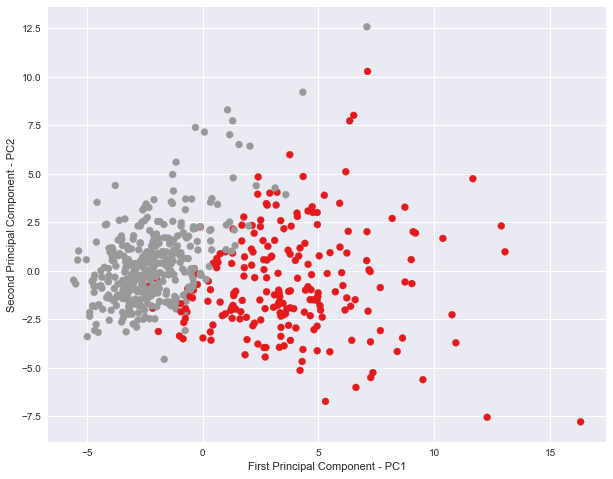

In [19]:
plt.figure(figsize=(10,8))
plt.scatter(
    x=df_pca['PC1'],
    y=df_pca['PC2'],
    c=cancer_data['target'],
    cmap='Set1')
plt.xlabel('First Principal Component - PC1')
plt.ylabel('Second Principal Component - PC2')

**Instead of 30 features, with only two components, the data can be easily separated into its target classes, Malignant and Benign, represented as 0 and 1. This is the power of PCA.**

### Component's Interpretation  

We already learned in the lecture that it is not a trivial task to understand what these components represent. However, PCA has a great power of dimensionality reduction.<br>

The components don't relate one-on-one to each other, they actually correspond to combinations of the all original features, the components themselves are stored as an attribute of the fitted PCA object.<br>
We can get the components as below!

In [20]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

**Each row, in this numpy matrix array, represents a principal component, and each column relates back to the original features. <br>**

**Let's convert this numpy array into pandas dataframe and visualize this relationship with a heatmap, we will pass the columns from our original dataset.**

In [21]:
df_pca_comp = pd.DataFrame(
    pca.components_,
    columns = cancer_data['feature_names'])
df_pca_comp.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


*The dataframe has 2 rows, 0 index for Principal Component 1 and its relationship to each of 30 features in the original dataset. Similarly, index 1 for Principal Component 2 and its relationship to each of 30 features in the original dataset. <br>*

Let's have a look on another plot, a heatmap showing the relationship of principal components to the features in the dataset. We can use seaborn's ability to plot heatmap.

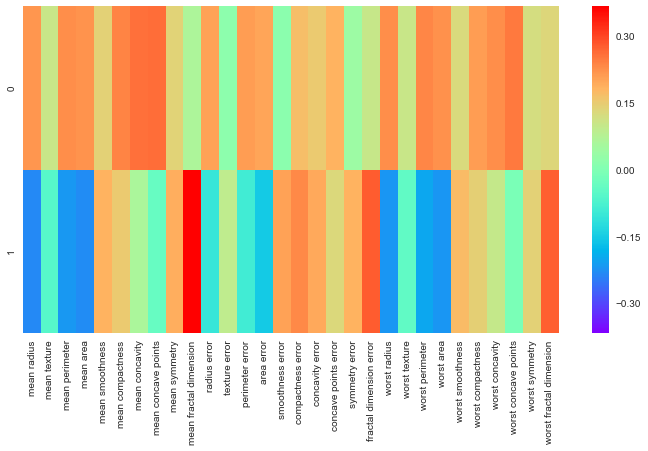

In [22]:
plt.figure(figsize=(12,6))
sns.heatmap(
    df_pca_comp,
    cmap='rainbow')

The heatmap visually shows the relationship of the principle component to the respective feature. Higher the value is, more correlated the feature is to the principal component.
This is what these components represent, the combination of all the original features in the dataset. We can also see which feature is more important to the respective principal component. <br>
# Excellent
I hope you enjoyed this lecture and got a good understanding of PCA. This information will very useful whenever you will be dealing with the data with higher number of feature (high dimensional).<br>

## Optional -- Logistic Regression (Classification) model on Principal Components
PCA is a dimensionally reduction procedure. You have reduced version of the cancer data into a dataframe "df_pca". You can any classification algorithm on this reduced data (instead of doing it on whole data with 30 features) and compare the results. You will see that the data will be easily separated using only PC1 and PC2. <br>
Let's feed in the reduced data after PCA into the logistic regression model and see how it perform on the reduced data!

In [23]:
#Separating features and target values 
X = df_pca
y = cancer_data['target']

In [24]:
#Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [25]:
#Importing model and creating its instance 
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression()

In [26]:
#Training
logR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
#Predicting 
predictions = logR.predict(X_test)

In [28]:
#Evaluation -- Classification Report and Confusion Matrix 
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))

             precision    recall  f1-score   support

          0       0.97      0.95      0.96        63
          1       0.97      0.98      0.98       108

avg / total       0.97      0.97      0.97       171

[[ 60   3]
 [  2 106]]


The logistic regression model actually performed very well on the principal components! The results here are much better then those we got in the logistic regression. However, please note that we only used 14 features in the logistic regression section where as we have used all the 30 features in our PCA. Hence, the components, PC1 and PC2, are actually the representation of all the 30 features in the dataset.  <br>